## Project 2
**Mohammad Kamal Sadeghabadi Farahani**

## Description
In this project we implemented **Exponetial LIF** and **Adaptive LIF** models

## Exponential LIF Model
The Exponential LIF models computes its potential using the below diffrential equation: 

$\tau . \frac{du}{dt} = -(u - u_{rest}) + \Delta_t \exp(\frac {u - \theta_{rh}} {\Delta_t}) + R.I(t)$  

using above equation we implemented ELIFPopulation and will test it on diffrent input currents with five diffrent parameter sets given by the table below:  

| Neuron # | R | $u_{rest}$ | $u_{\theta}$ | $\tau$ | $\theta_{rh}$ | $\Delta_t$ |
| -------  | -------| ------- | ------- | ------- | ------- | ------- |
| 1 | 5 | -70 | -50 | 0.1 | -55 | 1 |
| 2 | 5 | -70 | -50 | 0.1 | -60 | 1 |
| 3 | 5 | -70 | -55 | 0.1 | -60 | 10 |
| 4 | 5 | -70 | -50 | 0.1 | -55 | 10 |
| 5 | 4 | -65 | -50 | 0.3 | -60 | 1 |

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Callable

import cnsproject.utils as utils
from cnsproject.network.neural_populations import ELIFPopulation
from cnsproject.network.monitors import Monitor
from cnsproject.plotting.plotting import plot_neuron_potential, plot_current, plot_FI_for_neuron

In [2]:
neuron_parameters = [
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 1,
        'theta_rh': -55
    },
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 1,
        'theta_rh': -60
    },
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 10,
        'theta_rh': -55
    },
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 10,
        'theta_rh': -60
    },
    {
        'tau': 0.3,
        'resistance': 4,
        'rest_potential': -65,
        'threshold': -50,
        'sharpness': 1,
        'theta_rh': -60
    }
]

In [3]:
steps = 1000

currents = list(
    map(
        lambda x: (lambda t: x if t > 0.05 and t < .95 else 0 ),
        [_ for _ in range(1, 7)]))

noisy_currents = [
    utils.memo(lambda t: np.random.randn()),
    utils.memo(lambda t: 4 + np.random.randn()),
    utils.memo(lambda t: 5*t + np.random.randn())
]

In [4]:
def run_neuron(neuron, steps):
    potentials = []
    for i in range(steps):
        neuron.forward(None)
        potentials.append(neuron.potential)
    return potentials

def plot_neuron_and_current(NeuronType, param, currents, steps):
    for current in currents:
        neuron = NeuronType(**param, current=current, shape=(1,))
        potentials = run_neuron(neuron, steps)
        plot_current(current, steps, neuron.dt)
        plot_neuron_potential(neuron, potentials)
        print('------------------------------\n')

## Neuron number 1

In [5]:
param = neuron_parameters[0]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 1, 'theta_rh': -55}


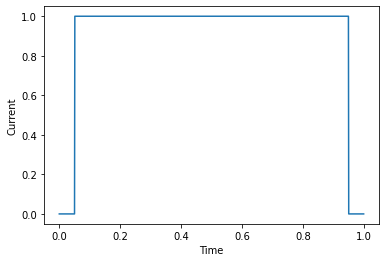

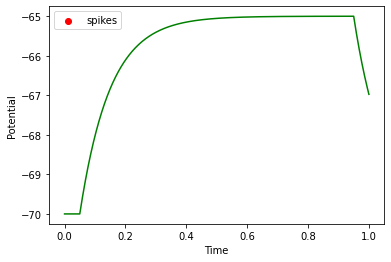

------------------------------



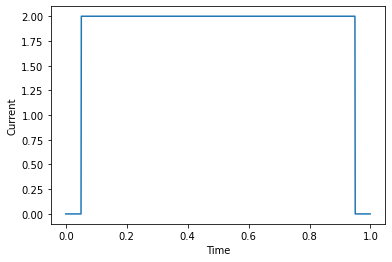

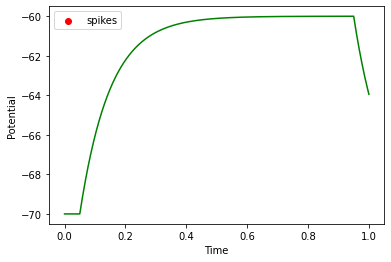

------------------------------



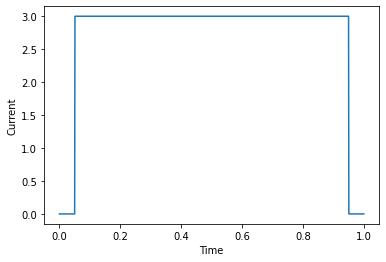

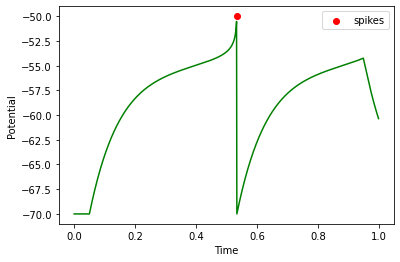

------------------------------



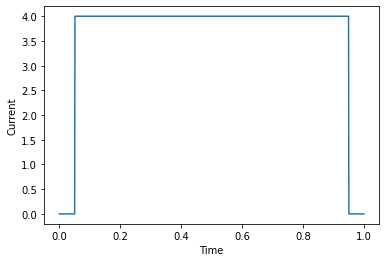

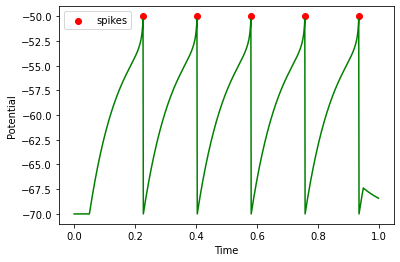

------------------------------



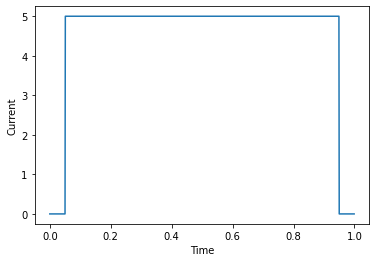

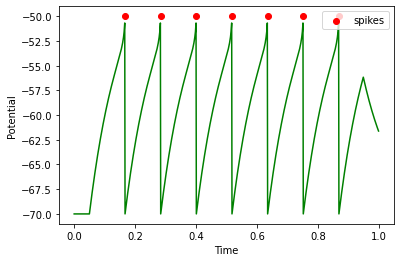

------------------------------



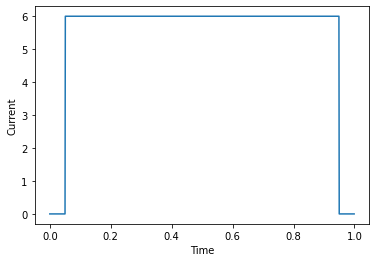

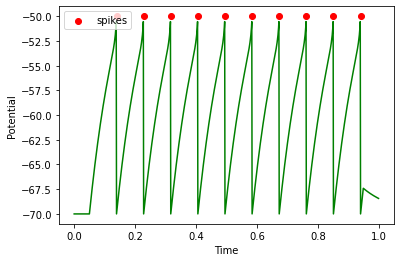

------------------------------



In [6]:
print(param)
plot_neuron_and_current(ELIFPopulation, param, currents, steps)

#### F-I curve

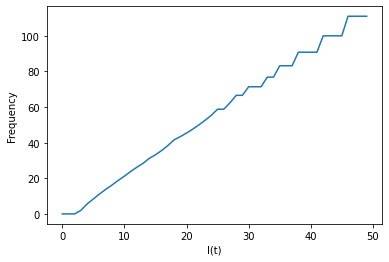

In [7]:
elif_neuron = ELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(elif_neuron)

#### Potential Changes with noisy currents

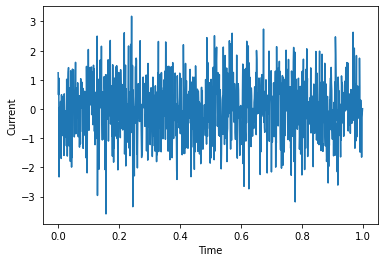

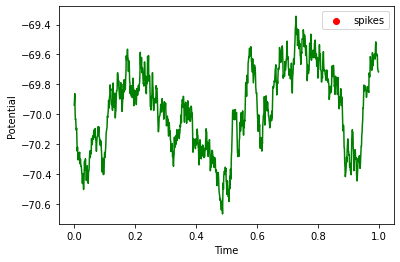

------------------------------



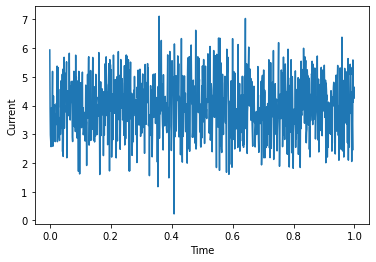

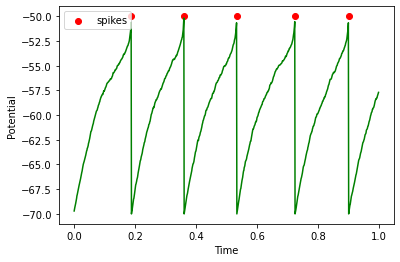

------------------------------



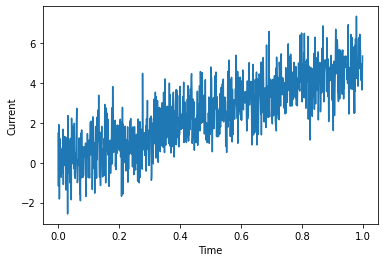

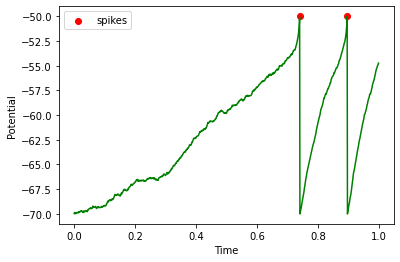

------------------------------



In [8]:
plot_neuron_and_current(ELIFPopulation, param, noisy_currents, steps)

## Neuron number 2

In [9]:
param = neuron_parameters[1]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 1, 'theta_rh': -60}


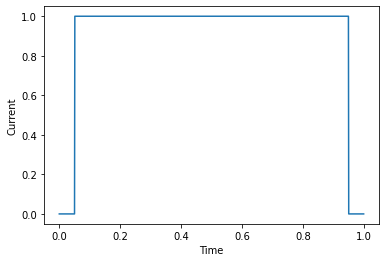

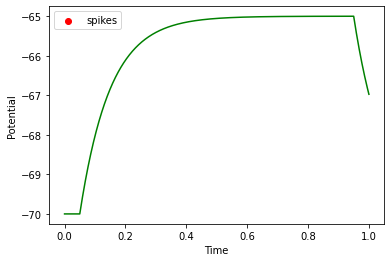

------------------------------



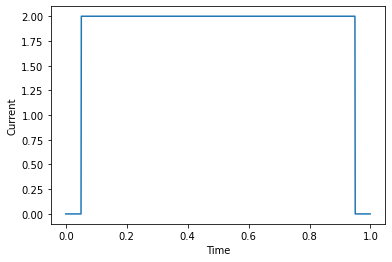

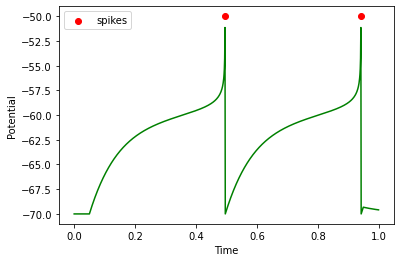

------------------------------



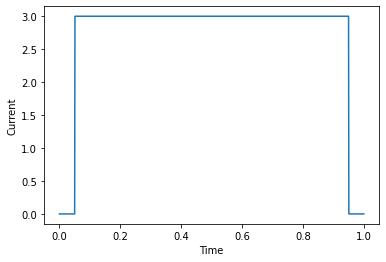

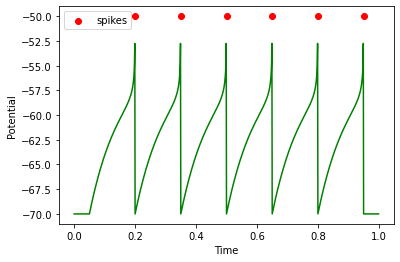

------------------------------



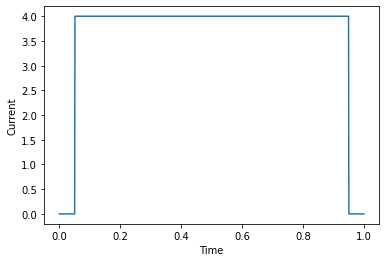

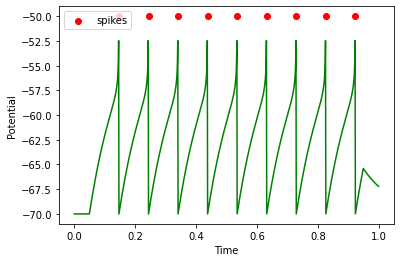

------------------------------



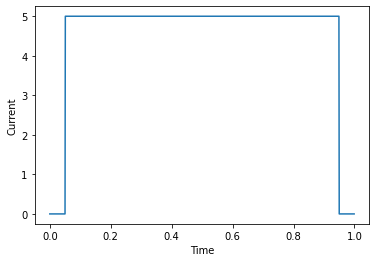

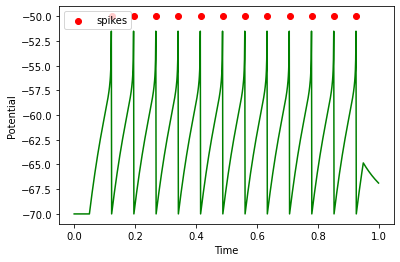

------------------------------



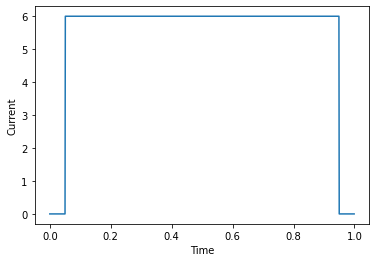

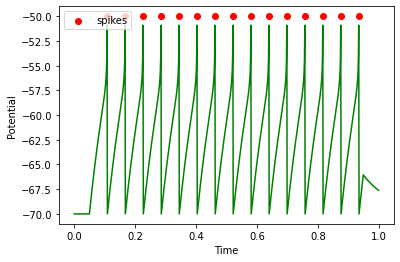

------------------------------



In [10]:
print(param)
plot_neuron_and_current(ELIFPopulation, param, currents, steps)

#### F-I curve

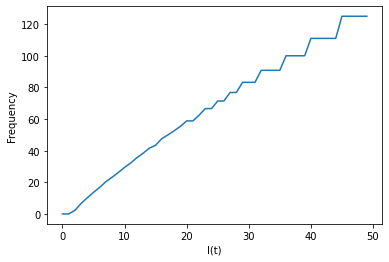

In [11]:
elif_neuron = ELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(elif_neuron)

#### Potential Changes with noisy currents

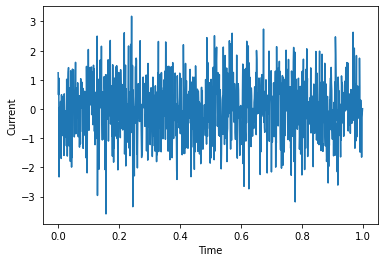

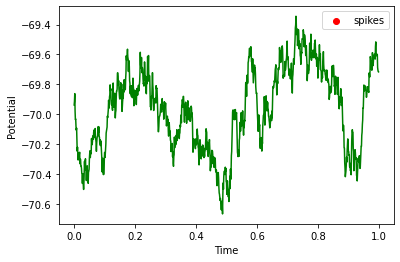

------------------------------



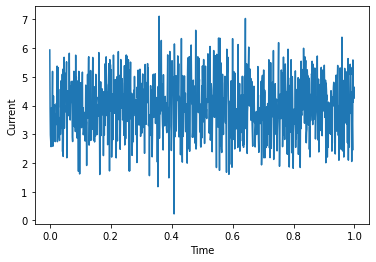

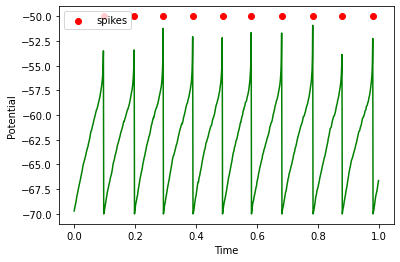

------------------------------



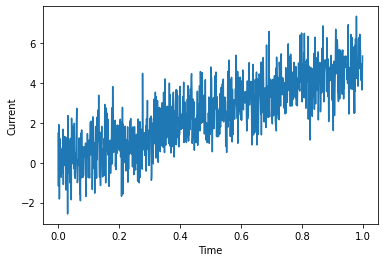

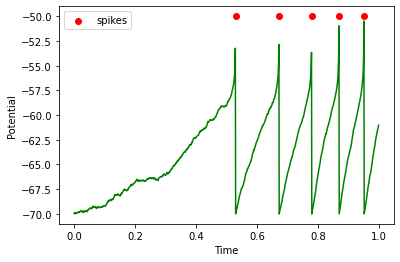

------------------------------



In [12]:
plot_neuron_and_current(ELIFPopulation, param, noisy_currents, steps)

## Neuron number 3

In [13]:
param = neuron_parameters[2]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 10, 'theta_rh': -55}


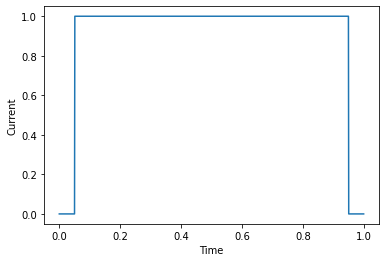

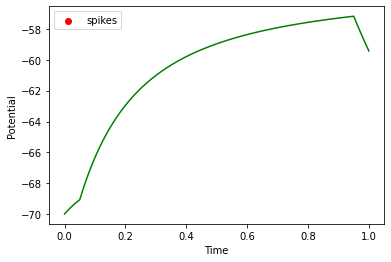

------------------------------



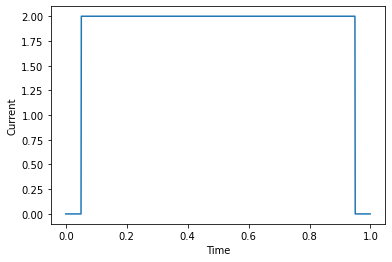

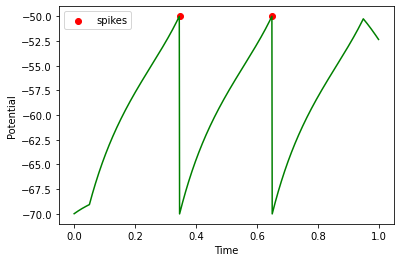

------------------------------



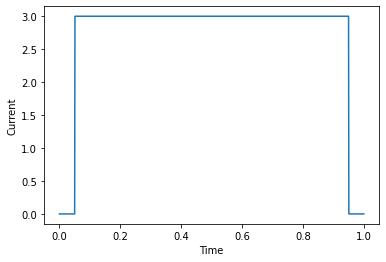

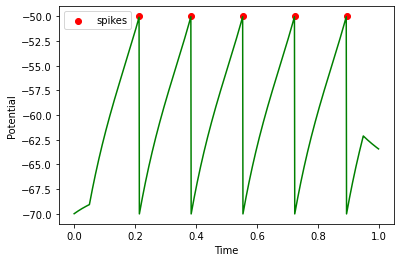

------------------------------



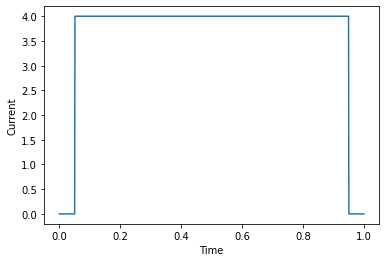

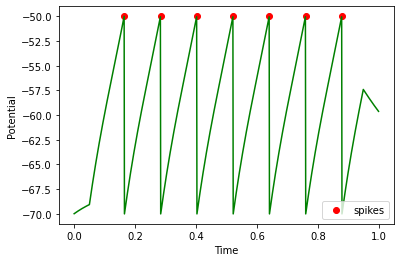

------------------------------



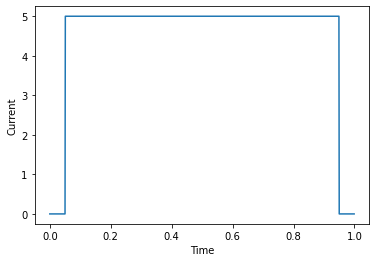

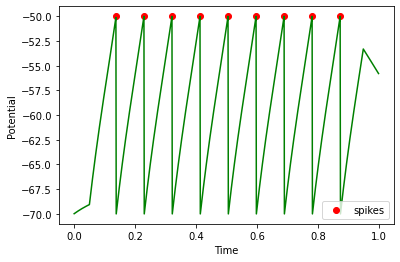

------------------------------



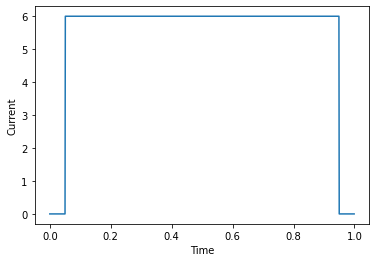

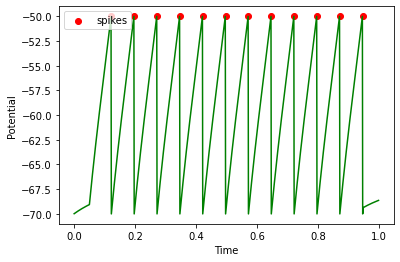

------------------------------



In [14]:
print(param)
plot_neuron_and_current(ELIFPopulation, param, currents, steps)

#### F-I curve

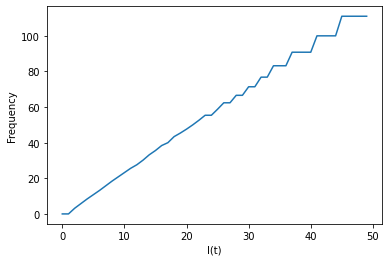

In [15]:
elif_neuron = ELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(elif_neuron)

#### Potential Changes with noisy currents

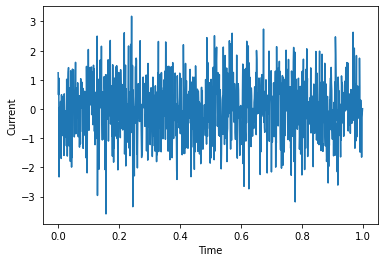

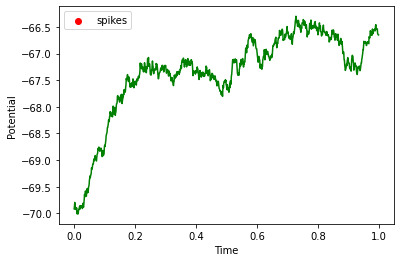

------------------------------



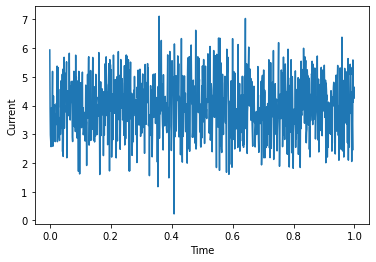

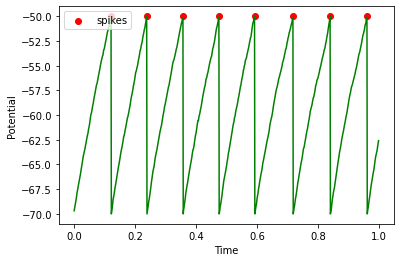

------------------------------



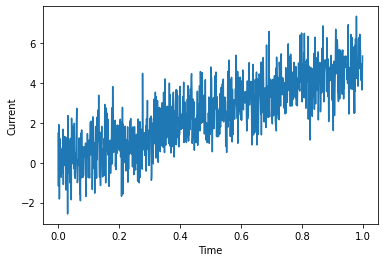

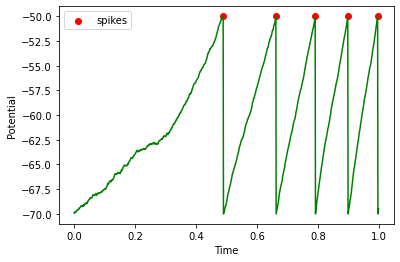

------------------------------



In [16]:
plot_neuron_and_current(ELIFPopulation, param, noisy_currents, steps)

## Neuron number 4

In [17]:
param = neuron_parameters[3]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 10, 'theta_rh': -60}


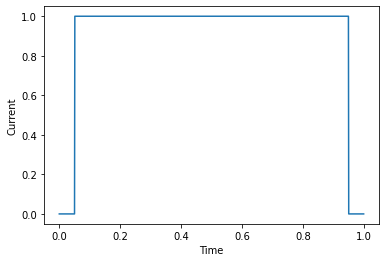

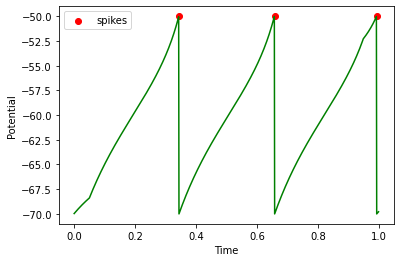

------------------------------



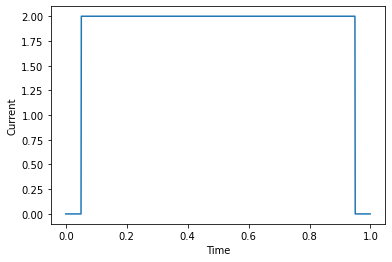

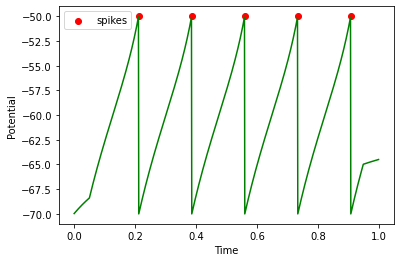

------------------------------



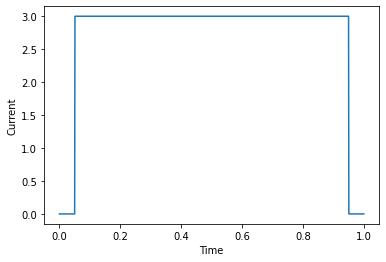

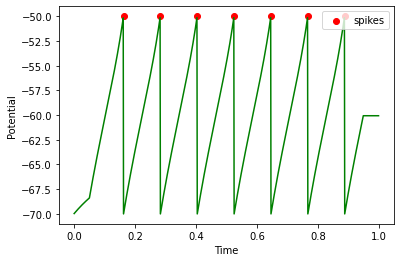

------------------------------



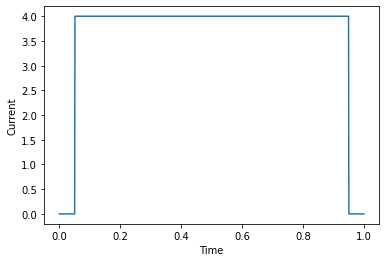

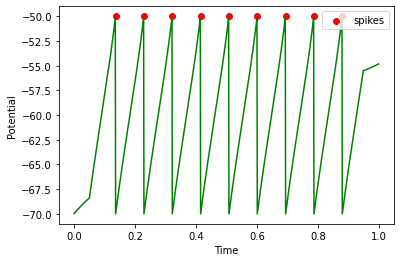

------------------------------



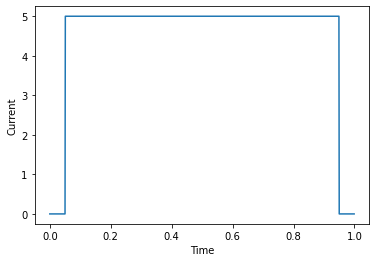

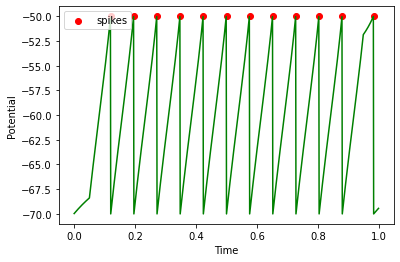

------------------------------



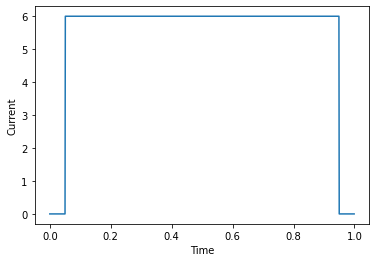

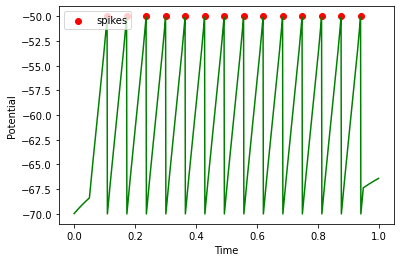

------------------------------



In [18]:
print(param)
plot_neuron_and_current(ELIFPopulation, param, currents, steps)

#### F-I curve

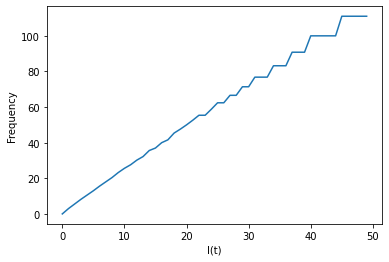

In [19]:
elif_neuron = ELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(elif_neuron)

#### Potential Changes with noisy currents

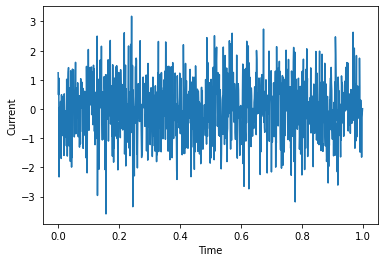

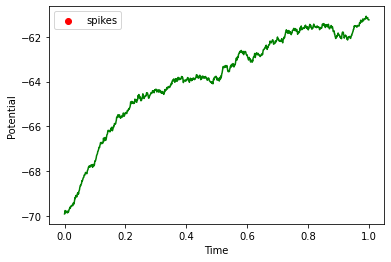

------------------------------



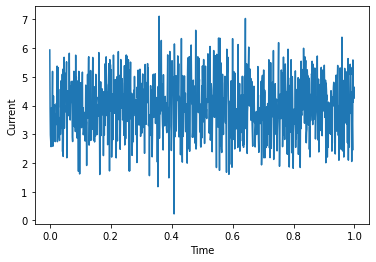

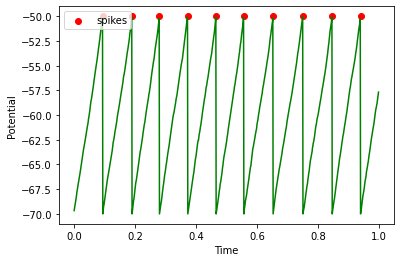

------------------------------



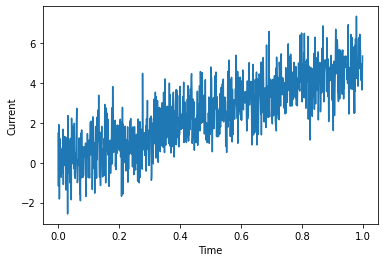

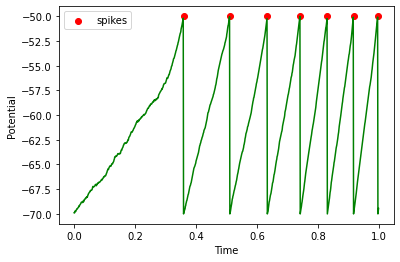

------------------------------



In [20]:
plot_neuron_and_current(ELIFPopulation, param, noisy_currents, steps)

## Neuron number 5

In [21]:
param = neuron_parameters[4]

#### Potential Change Plots:

{'tau': 0.3, 'resistance': 4, 'rest_potential': -65, 'threshold': -50, 'sharpness': 1, 'theta_rh': -60}


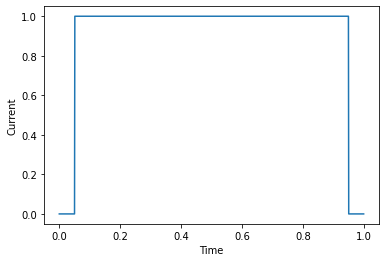

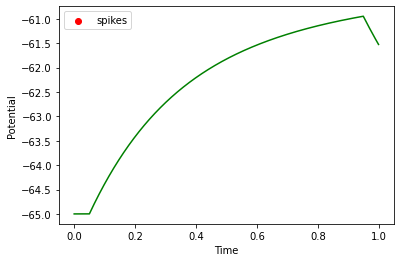

------------------------------



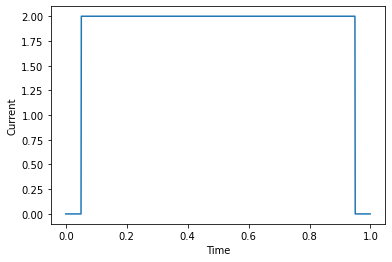

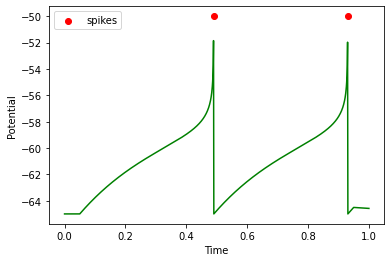

------------------------------



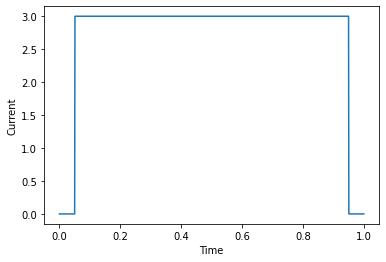

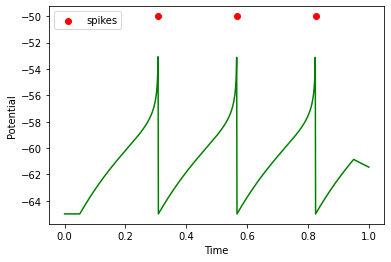

------------------------------



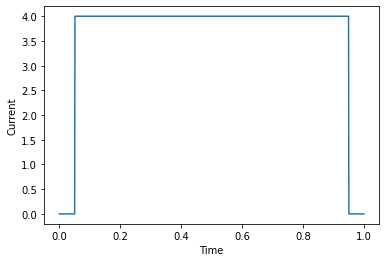

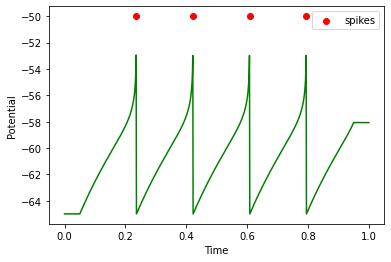

------------------------------



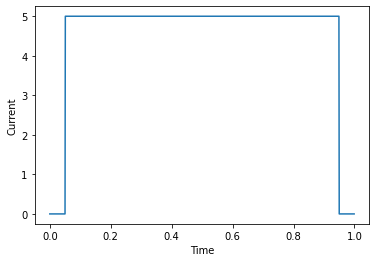

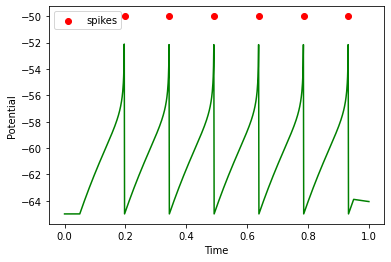

------------------------------



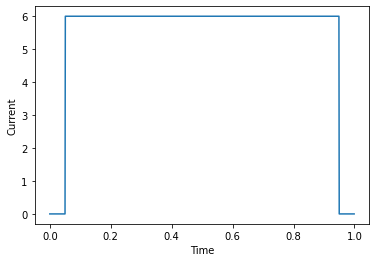

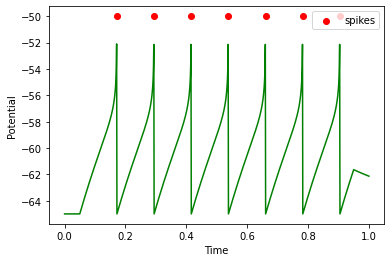

------------------------------



In [22]:
print(param)
plot_neuron_and_current(ELIFPopulation, param, currents, steps)

#### F-I curve

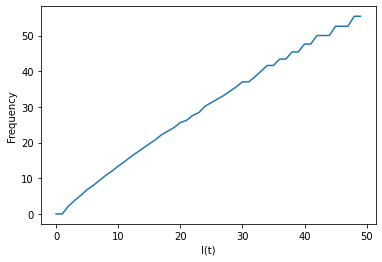

In [23]:
elif_neuron = ELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(elif_neuron)

#### Potential Changes with noisy currents

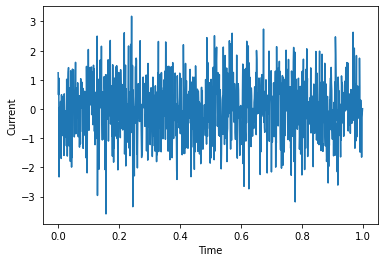

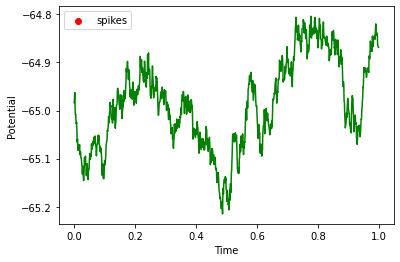

------------------------------



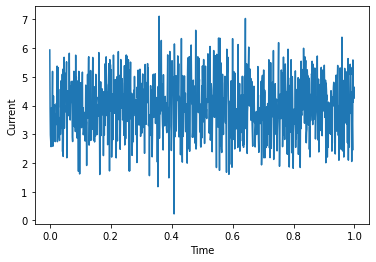

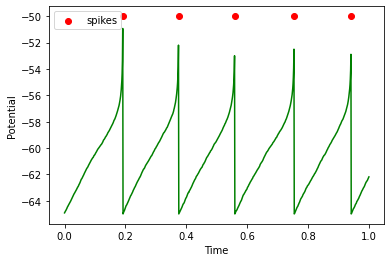

------------------------------



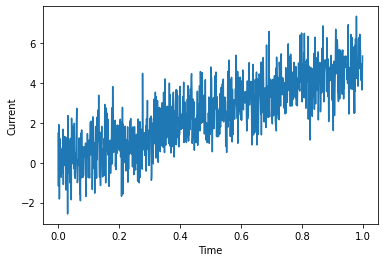

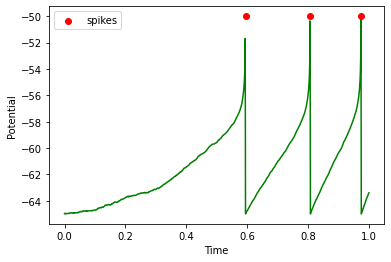

------------------------------



In [24]:
plot_neuron_and_current(ELIFPopulation, param, noisy_currents, steps)

## Analysis of exponential LIF neuron behavior
In the exponential LIF models compared to simple LIF model we have added a non linear function $\exp(\frac {u - \theta_{rh}} {\Delta_t})$ to the potential change with respect to time.  
As we can see this equation has two more parameters than simple LIF model named $\theta_{rh}$ and $\Delta_t$.by taking a derivative with respect to u from:  

$\tau . \frac{du}{dt} = -(u - u_{rest}) + \Delta_t \exp(\frac {u - \theta_{rh}} {\Delta_t}) + R.I(t)$  

Then we understand that $\theta_{rh}$ is where the derivative is equal to zero and after that point the derivative is positive, so we expect if we give a constant current to neuron that is strong enough to make the neuron spike with certain frequency as long as the current is flowing through the neuron, the concavity of the neuron potential curve with respect to time be as follows:
* as long as the pontential is less than $\theta_{rh}$ the curve is concave down
* after reaching $\theta_{rh}$ the curve becomes concave up

in other words $\theta_{rh}$ is the inflection point for the potential with respect to time curve. we can see this behavior in all of our neurons.
furthermore we expect that the neuron that has the same parameters compared to another neuron but a lower $\theta_{rh}$ will have more spikes and thus higher frequency with the same current, by comparing neuron number 1 and neuron number 2 we can observe this behavior clearly.  
The other paramters is $\Delta_t$ which appears in  $\Delta_t \exp(\frac {u - \theta_{rh}} {\Delta_t})$. for this term we have:  

$\lim_{\Delta_t \to \infty} -(u - u_{rest}) + \Delta_t \exp(\frac {u - \theta_{rh}} {\Delta_t}) + R.I(t) = \Delta_t = \infty$  

Thus if we increase $\Delta_t$ we expect these behavior:  
1. The shape of curve of potential whith respect to time becomes more linear as $\Delta_t$ grows
2. The shape of curve of potential whith respect to time after $\theta_{rh}$ when it's leading to spike becomes less concave up
3. The global minimum at $\theta_{rh}$ has higher value in a neuron with same parameters to other but a higher $\Delta_t$  

we can clearly see these behavior in neurons 3 and 4 compared to neurons 1 and 2.

## Adaptive LIF Model
The adaptive LIF model computes its potential using two below diffrential equations:

$\tau_m . \frac{du}{dt} = -(u - u_{rest}) + \Delta_t \exp(\frac {u - \theta_{rh}} {\Delta_t}) -Rw + R.I(t)$  
$\tau_{w} . \frac{dw}{dt} = a(u - u_{rest}) - w + b\tau_w\sum_{f}\delta(t-t^f)$

using above equation we implemented ELIFPopulation and will test it on diffrent input currents with five diffrent parameters set given by the table below:  

| Neuron # | R | $u_{rest}$ | $u_{\theta}$ | $\tau_m$ | $\theta_{rh}$ | $\Delta_t$ | $tau_w$ | a | b |
| -------  | -------| ------- | ------- | ------- | ------- | ------- | ------- | ------- | -------|
| 1 | 5 | -70 | -50 | 0.1 | -55 | 2 | 1 | 0.001 | 0.0002 |
| 2 | 5 | -70 | -50 | 0.1 | -55 | 2 | 0.01 | 0.001 | 0.0002 |
| 3 | 5 | -70 | -55 | 0.1 | -55 | 2 | 1 | 0.003 | 0.0002 |
| 4 | 5 | -70 | -50 | 0.1 | -55 | 2 | 1 | 0.001 | 0.01 |
| 5 | 4 | -70 | -50 | 0.1 | -55 | 2 | 1 | 0.001 | 0.001 |


In [25]:
from cnsproject.network.neural_populations import AELIFPopulation
from cnsproject.plotting.plotting import plot_adaptation

In [26]:
neuron_parameters = [
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 2,
        'theta_rh': -55,
        'tau_adaptation': 1,
        'subthreshold_adaptation': 0.001,
        'spike_trigger_adaptation': 0.0002
    },
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 2,
        'theta_rh': -55,
        'tau_adaptation': 0.01,
        'subthreshold_adaptation': 0.001,
        'spike_trigger_adaptation': 0.0002
    },
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 2,
        'theta_rh': -55,
        'tau_adaptation': 1,
        'subthreshold_adaptation': 0.003,
        'spike_trigger_adaptation': 0.0002
    },
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 2,
        'theta_rh': -55,
        'tau_adaptation': 1,
        'subthreshold_adaptation': 0.001,
        'spike_trigger_adaptation': 0.01
    },
    {
        'tau': 0.1,
        'resistance': 5,
        'rest_potential': -70,
        'threshold': -50,
        'sharpness': 2,
        'theta_rh': -55,
        'tau_adaptation': 1,
        'subthreshold_adaptation': 0.001,
        'spike_trigger_adaptation': 0.001
    },
]

In [27]:
steps = 10000

currents = list(
    map(
        lambda x: (lambda t: x if t > 0.05 and t < 9.95 else 0 ),
        [_ for _ in range(1, 7)]))

noisy_currents = [
    utils.memo(lambda t: np.random.randn()),
    utils.memo(lambda t: 4 + np.random.randn()),
    utils.memo(lambda t: 5*t + np.random.randn())
]

In [28]:
def run_neuron(neuron, steps):
    potentials = []
    adaptations = []
    for i in range(steps):
        neuron.forward(None)
        potentials.append(neuron.potential)
        adaptations.append(neuron.adaptation)
    return (potentials, adaptations)

def plot_neuron_and_adaptation_and_current(NeuronType, param, currents, steps):
    for current in currents:
        neuron = NeuronType(**param, current=current, shape=(1,))
        potentials, adaptations = run_neuron(neuron, steps)
        plot_current(current, steps, neuron.dt)
        plot_neuron_potential(neuron, potentials)
        plot_adaptation(adaptations, neuron.dt)
        print('------------------------------\n')

## Neuron number 1

In [29]:
param = neuron_parameters[0]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 2, 'theta_rh': -55, 'tau_adaptation': 1, 'subthreshold_adaptation': 0.001, 'spike_trigger_adaptation': 0.0002}


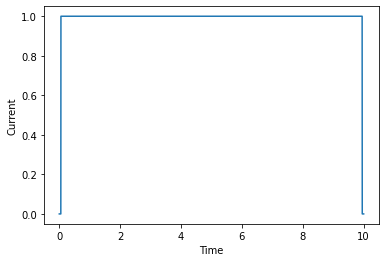

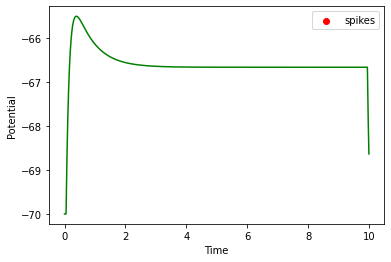

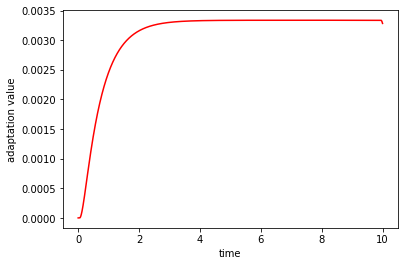

------------------------------



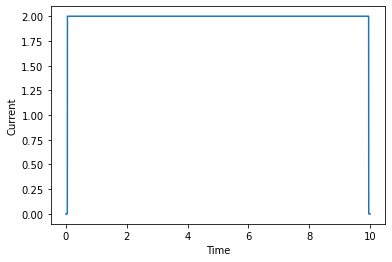

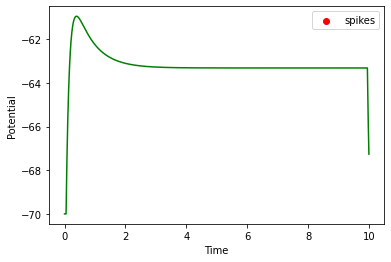

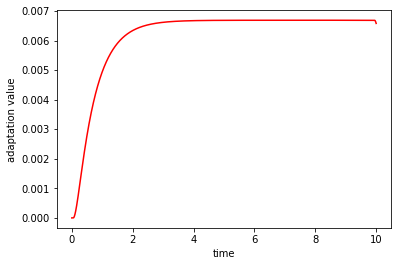

------------------------------



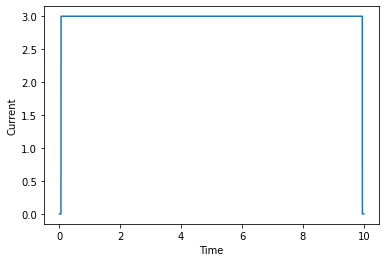

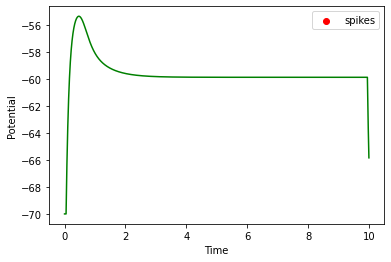

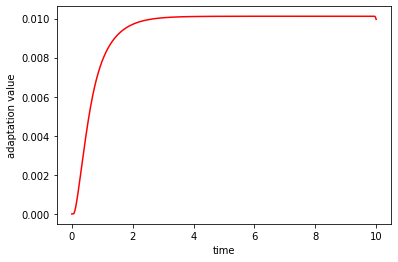

------------------------------



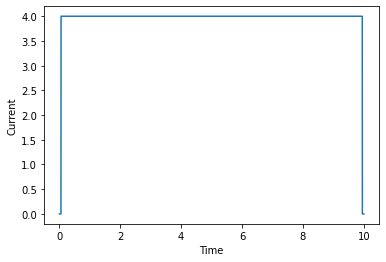

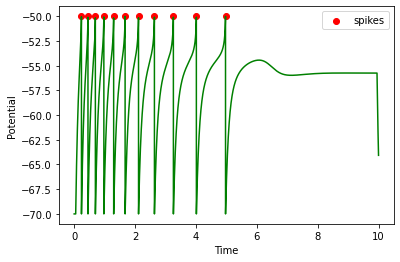

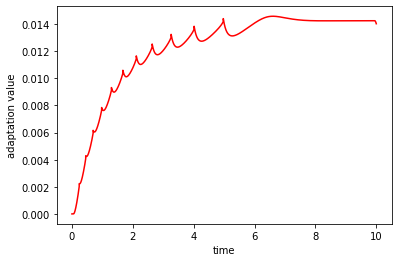

------------------------------



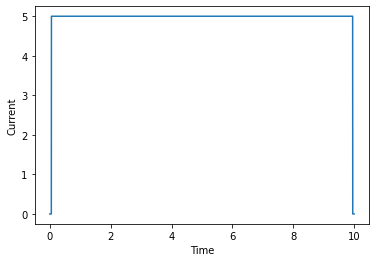

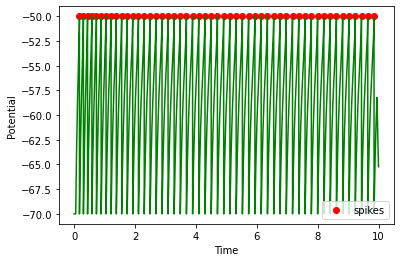

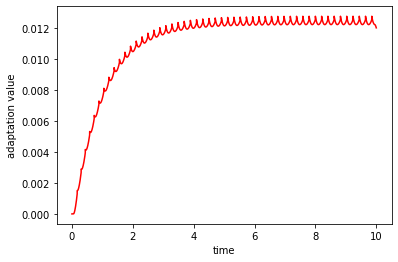

------------------------------



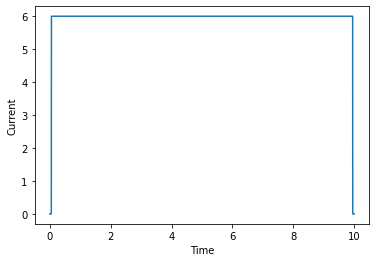

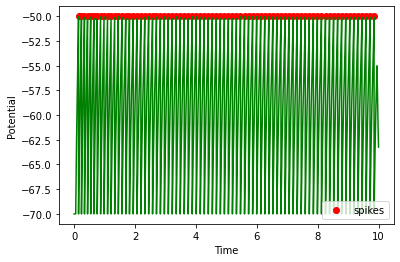

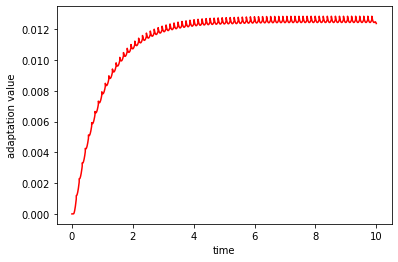

------------------------------



In [30]:
print(param)
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, currents, steps)

#### F-I curve

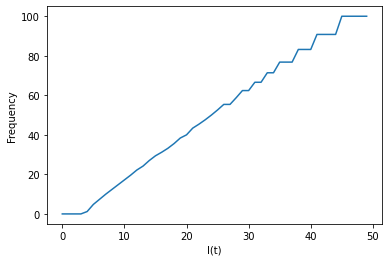

In [31]:
aelif_neuron = AELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(aelif_neuron)

#### Potential Changes with noisy currents

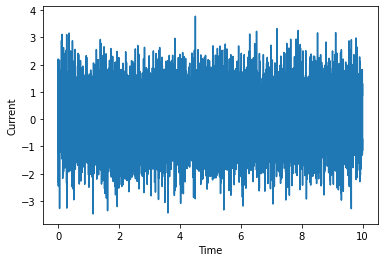

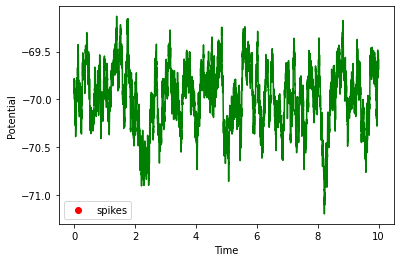

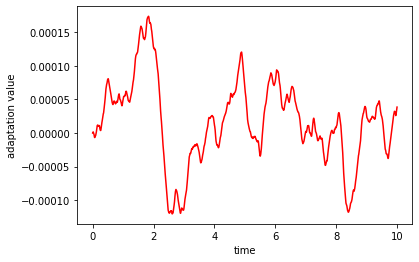

------------------------------



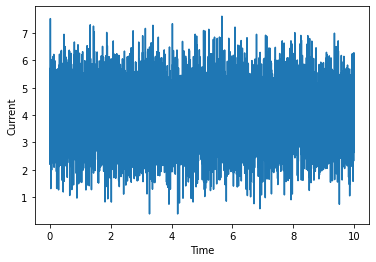

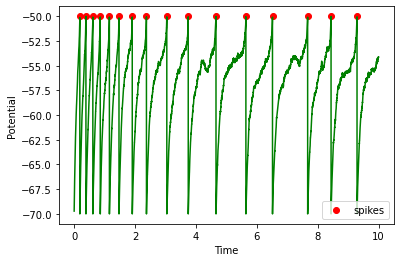

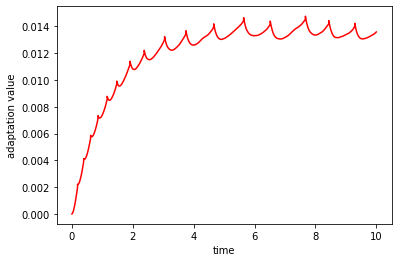

------------------------------



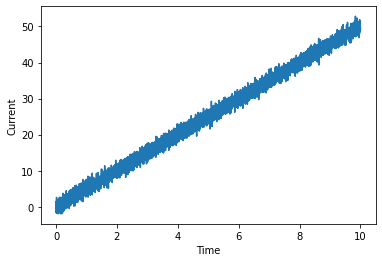

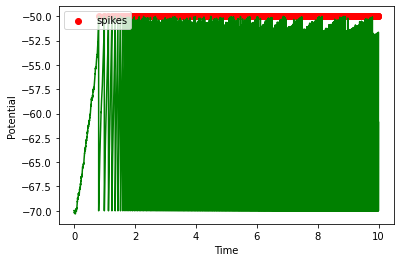

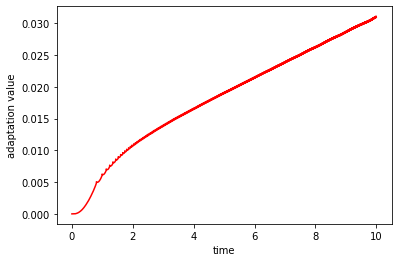

------------------------------



In [32]:
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, noisy_currents, steps)

## Neuron number 2

In [33]:
param = neuron_parameters[1]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 2, 'theta_rh': -55, 'tau_adaptation': 0.01, 'subthreshold_adaptation': 0.001, 'spike_trigger_adaptation': 0.0002}


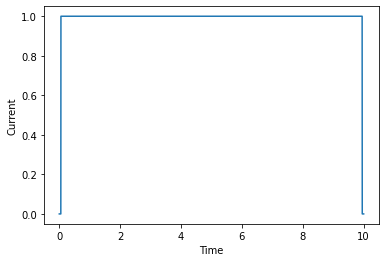

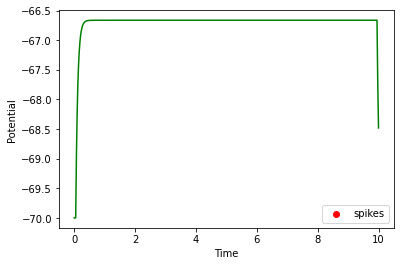

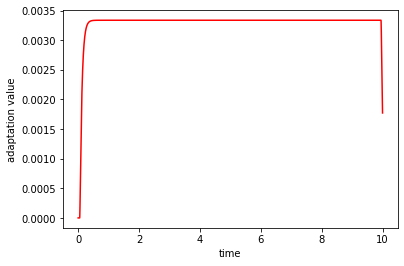

------------------------------



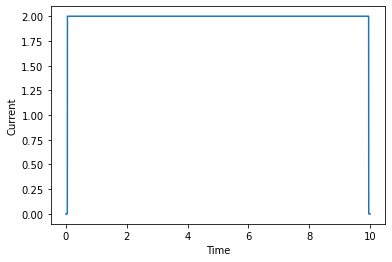

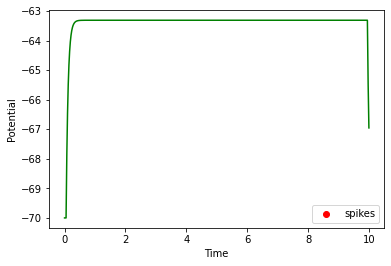

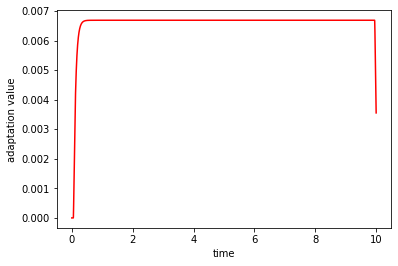

------------------------------



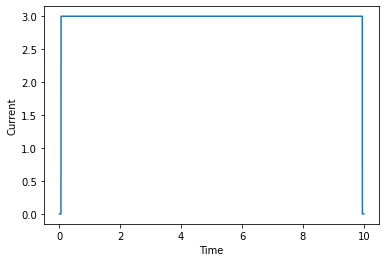

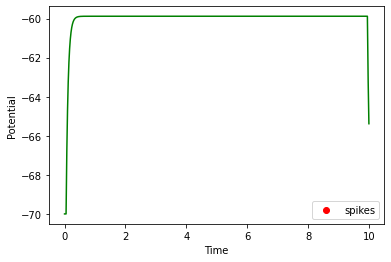

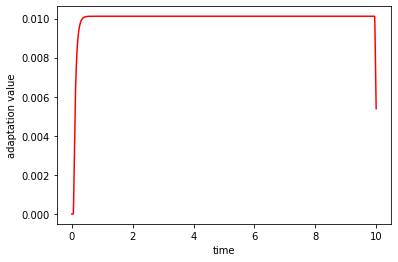

------------------------------



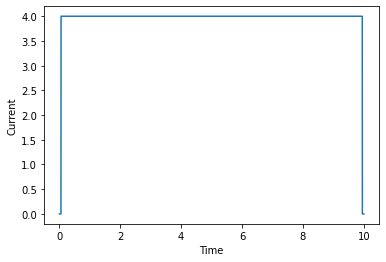

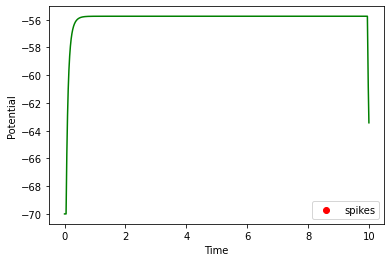

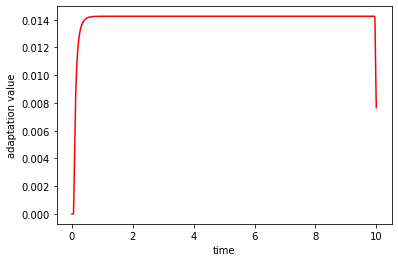

------------------------------



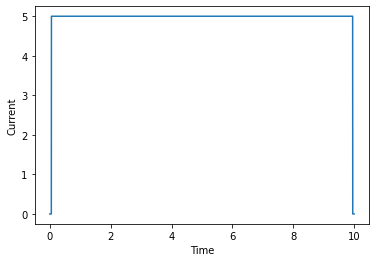

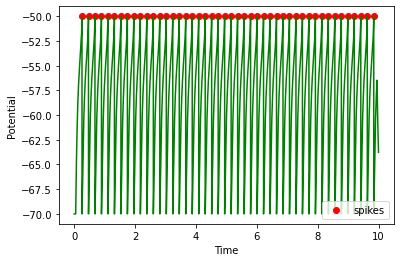

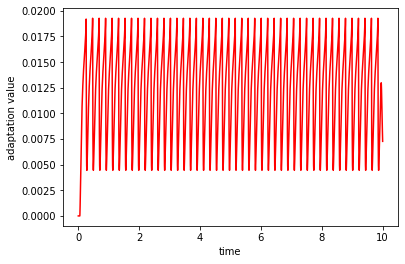

------------------------------



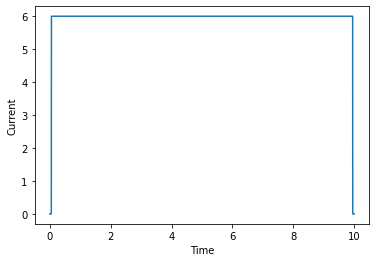

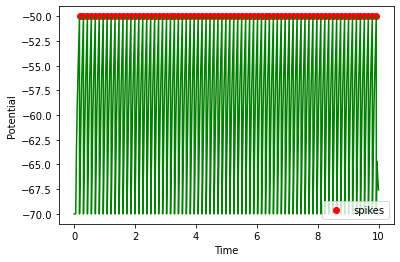

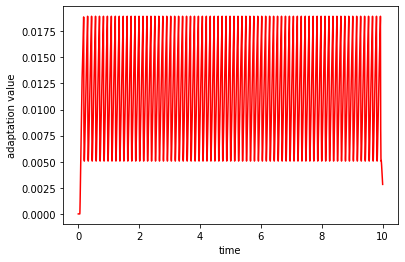

------------------------------



In [34]:
print(param)
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, currents, steps)

#### F-I curve

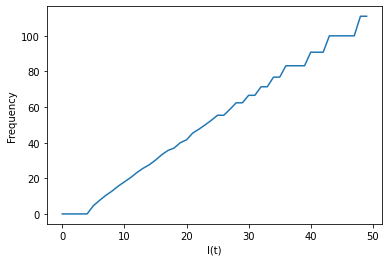

In [35]:
aelif_neuron = AELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(aelif_neuron)

#### Potential Changes with noisy currents

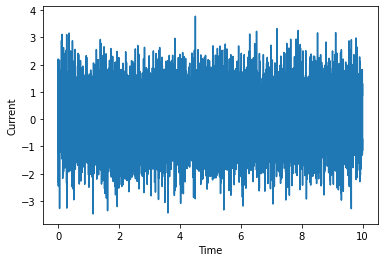

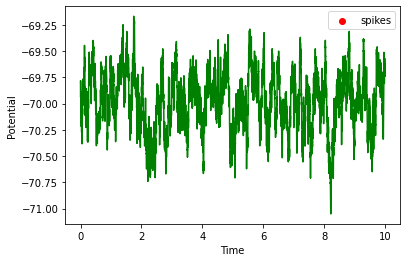

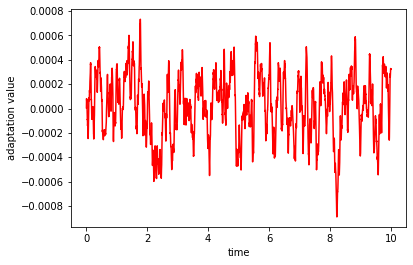

------------------------------



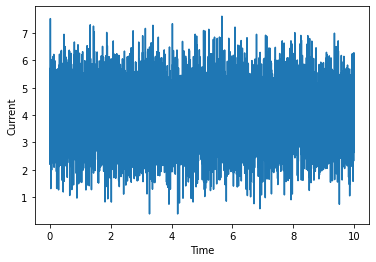

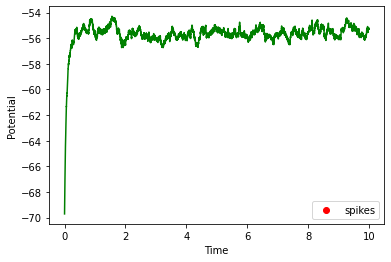

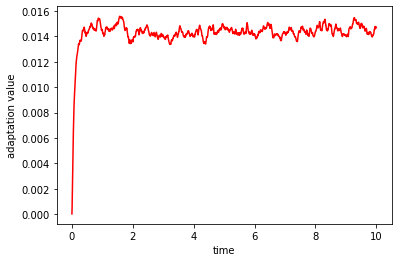

------------------------------



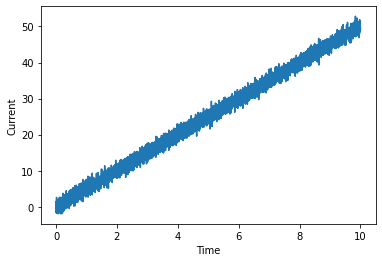

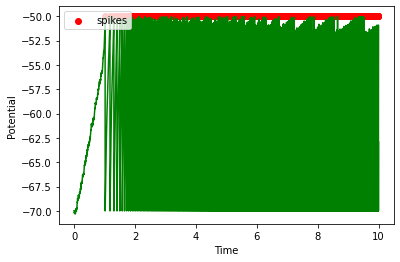

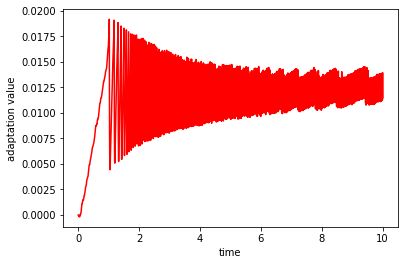

------------------------------



In [36]:
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, noisy_currents, steps)

## Neuron number 3

In [37]:
param = neuron_parameters[2]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 2, 'theta_rh': -55, 'tau_adaptation': 1, 'subthreshold_adaptation': 0.003, 'spike_trigger_adaptation': 0.0002}


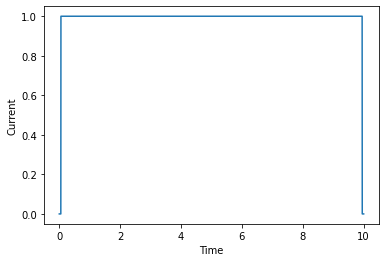

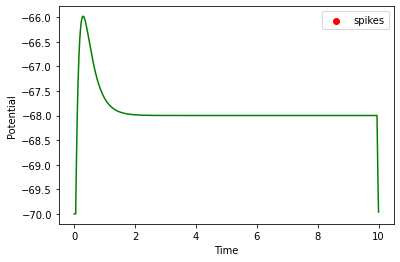

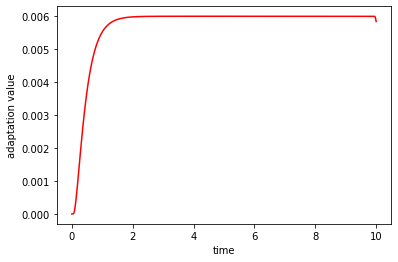

------------------------------



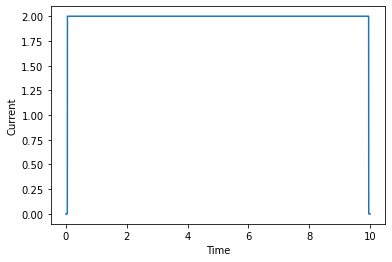

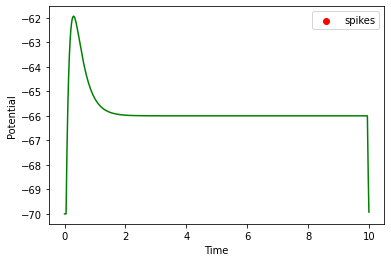

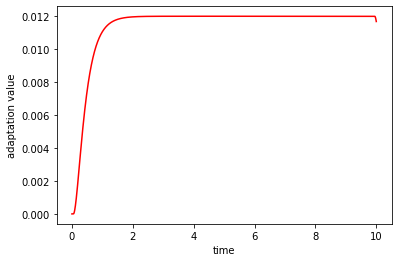

------------------------------



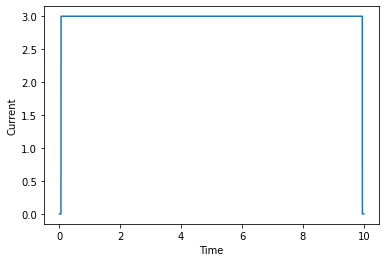

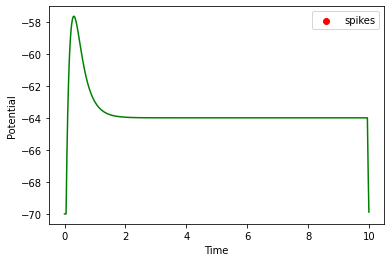

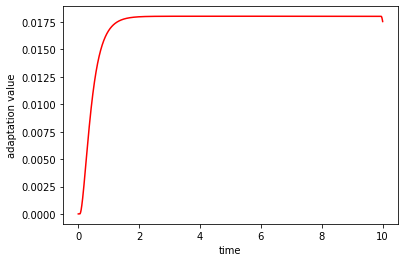

------------------------------



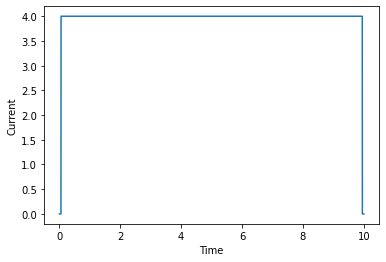

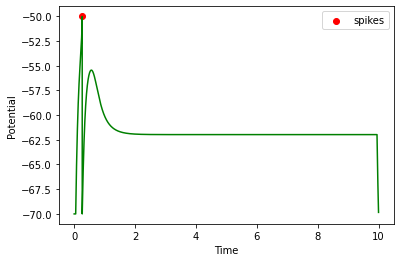

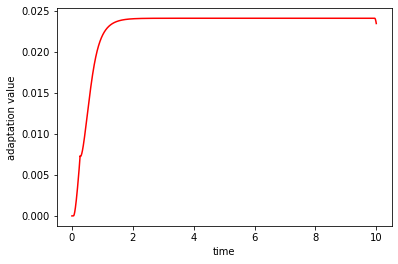

------------------------------



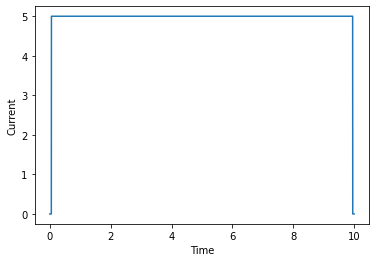

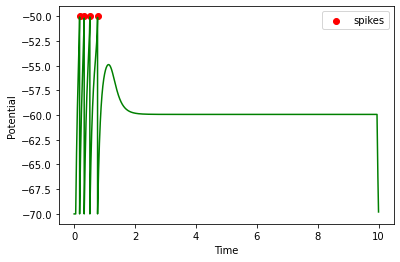

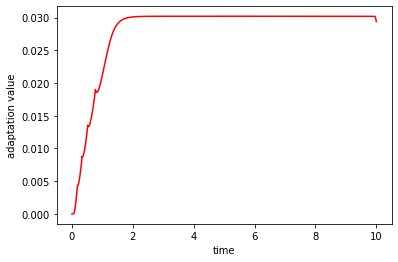

------------------------------



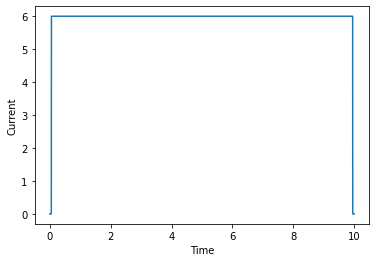

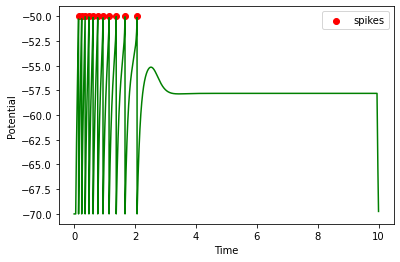

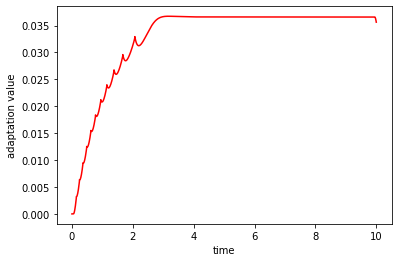

------------------------------



In [38]:
print(param)
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, currents, steps)

#### F-I curve

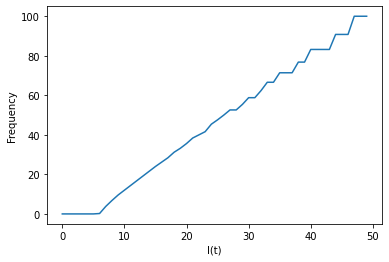

In [39]:
aelif_neuron = AELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(aelif_neuron)

#### Potential Changes with noisy currents

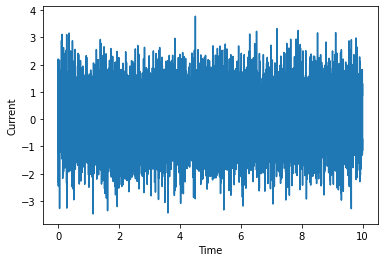

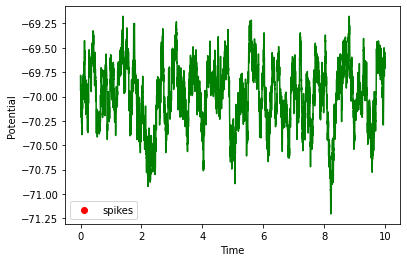

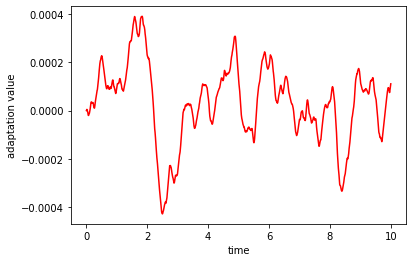

------------------------------



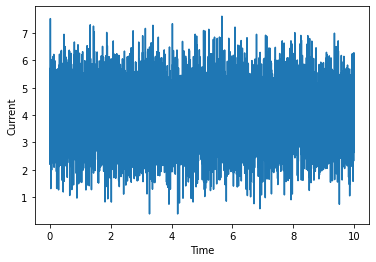

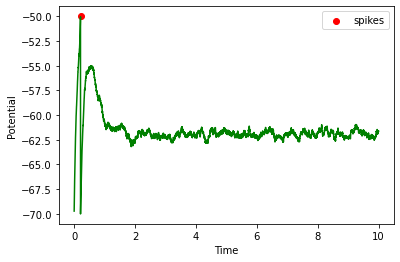

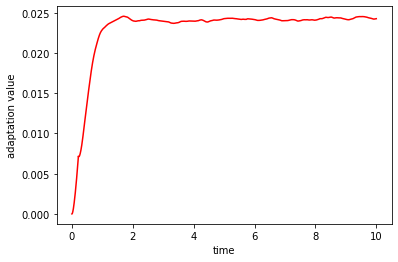

------------------------------



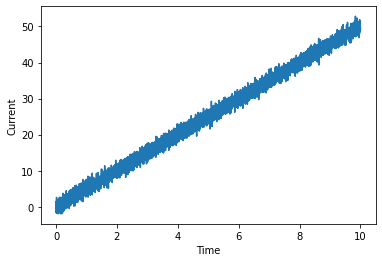

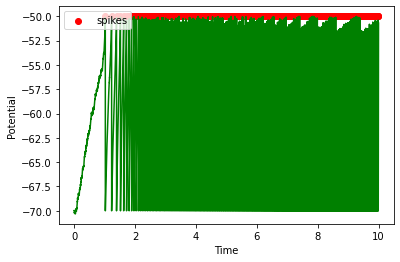

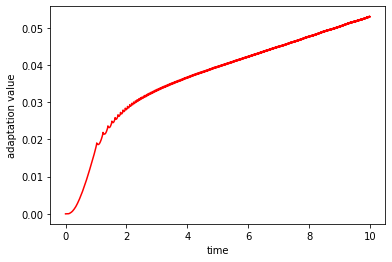

------------------------------



In [40]:
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, noisy_currents, steps)

## Neuron number 4

In [41]:
param = neuron_parameters[3]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 2, 'theta_rh': -55, 'tau_adaptation': 1, 'subthreshold_adaptation': 0.001, 'spike_trigger_adaptation': 0.01}


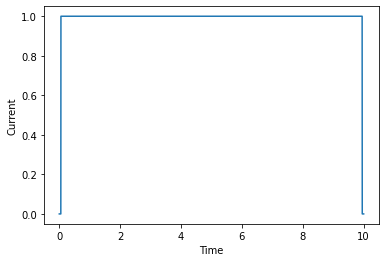

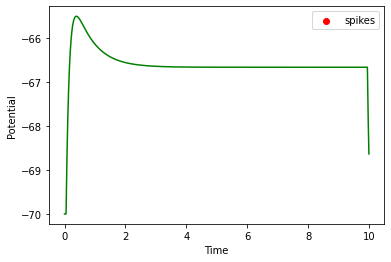

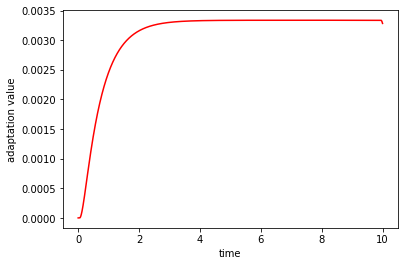

------------------------------



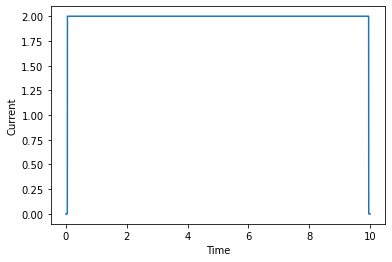

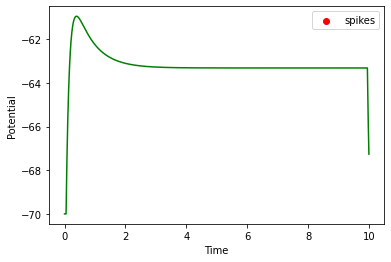

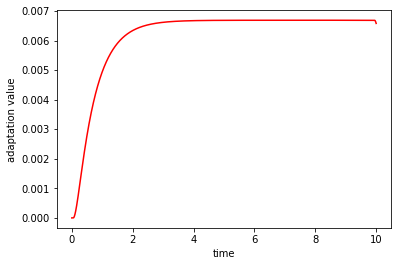

------------------------------



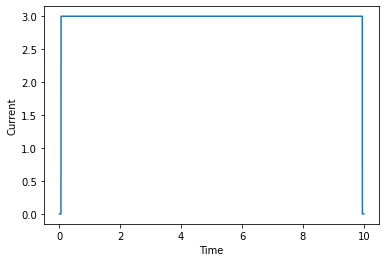

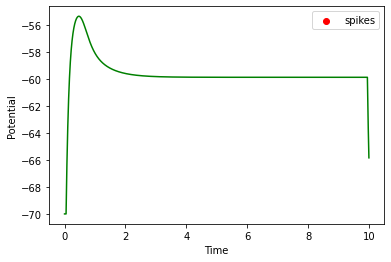

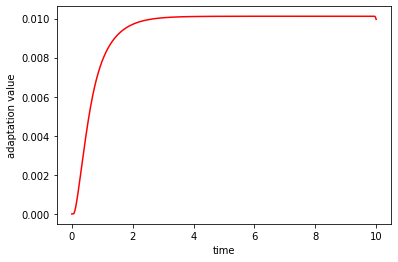

------------------------------



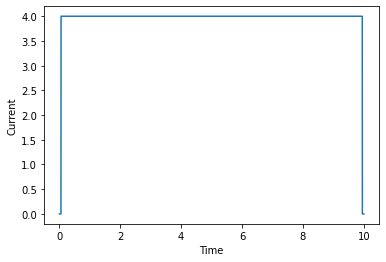

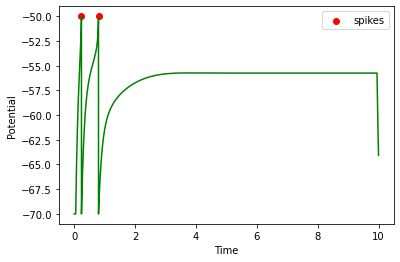

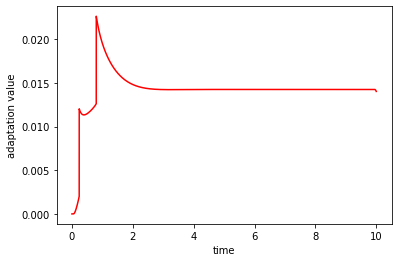

------------------------------



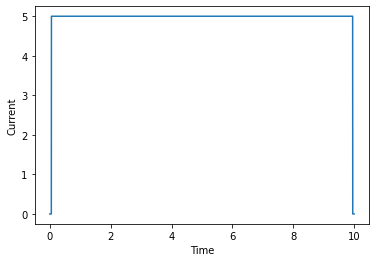

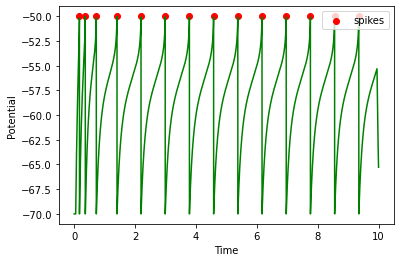

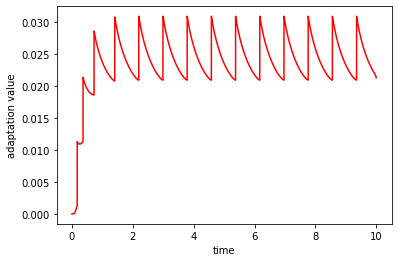

------------------------------



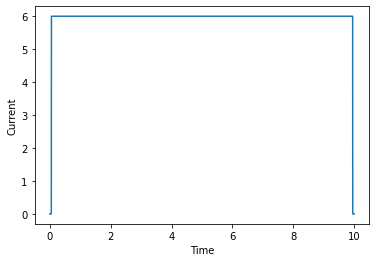

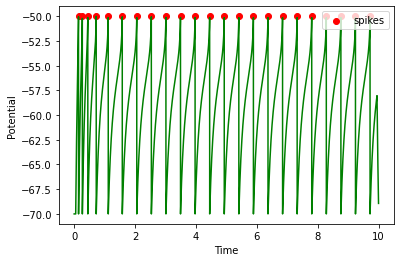

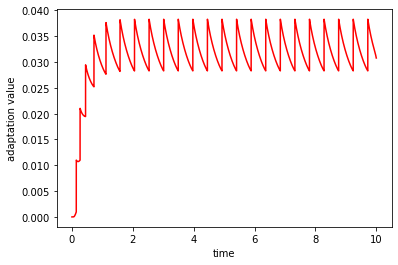

------------------------------



In [42]:
print(param)
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, currents, steps)

#### F-I curve

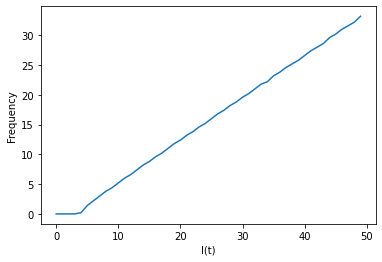

In [43]:
aelif_neuron = AELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(aelif_neuron)

#### Potential Changes with noisy currents

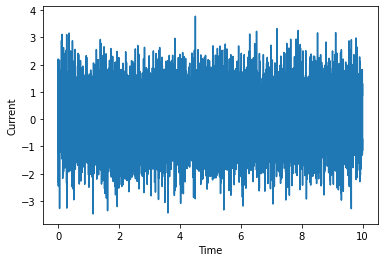

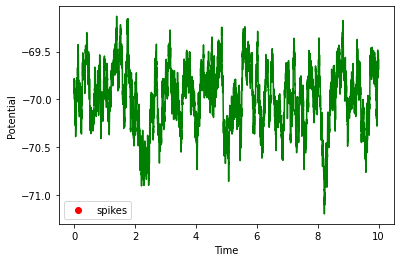

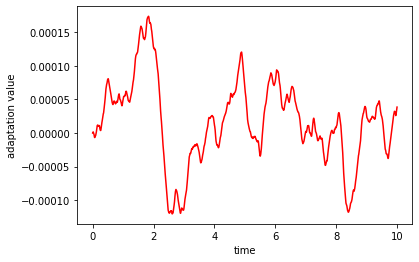

------------------------------



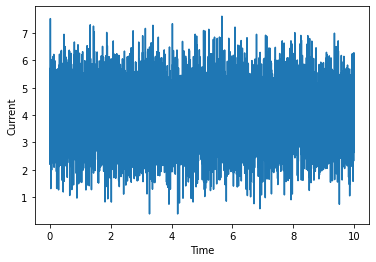

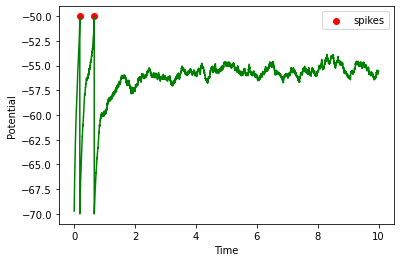

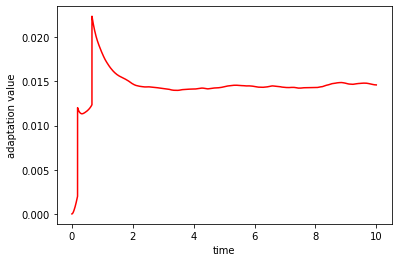

------------------------------



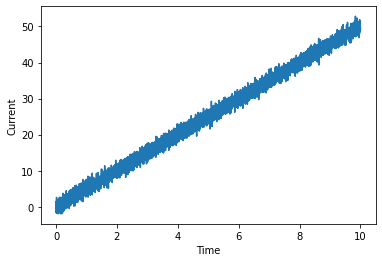

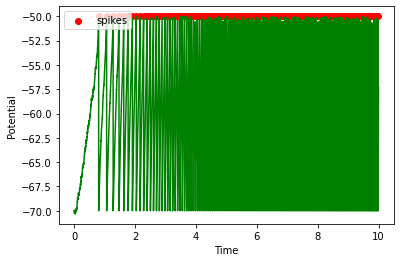

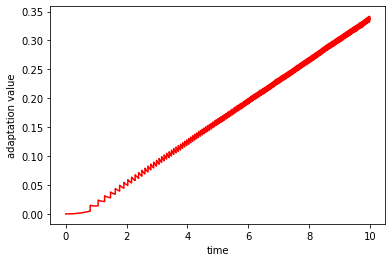

------------------------------



In [44]:
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, noisy_currents, steps)

## Neuron number 5

In [45]:
param = neuron_parameters[4]

#### Potential Change Plots:

{'tau': 0.1, 'resistance': 5, 'rest_potential': -70, 'threshold': -50, 'sharpness': 2, 'theta_rh': -55, 'tau_adaptation': 1, 'subthreshold_adaptation': 0.001, 'spike_trigger_adaptation': 0.001}


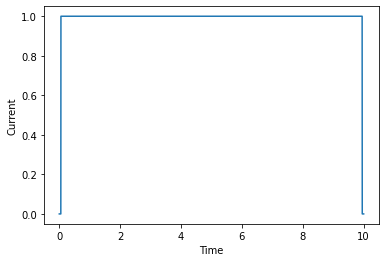

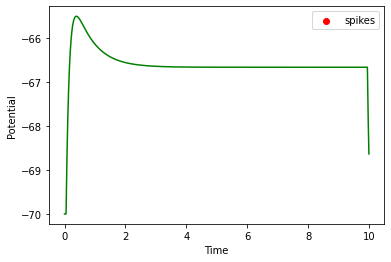

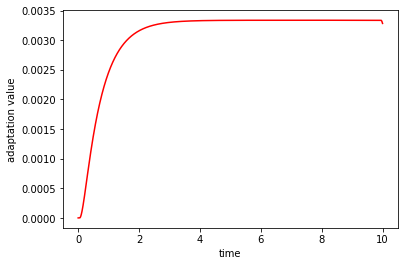

------------------------------



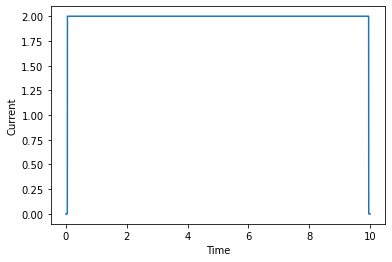

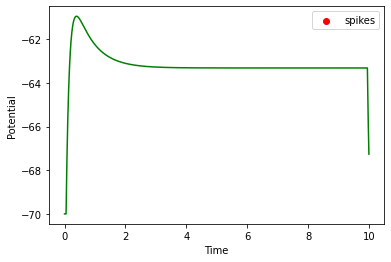

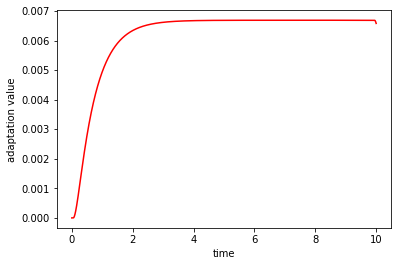

------------------------------



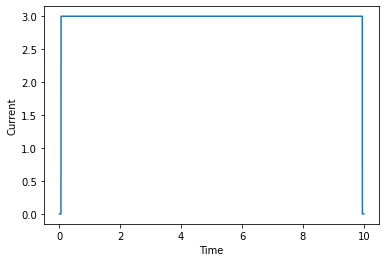

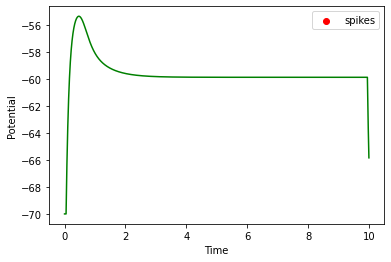

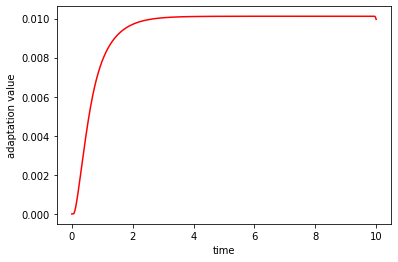

------------------------------



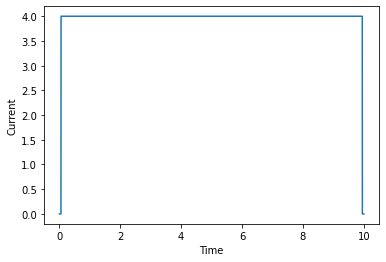

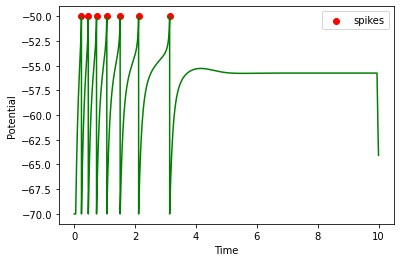

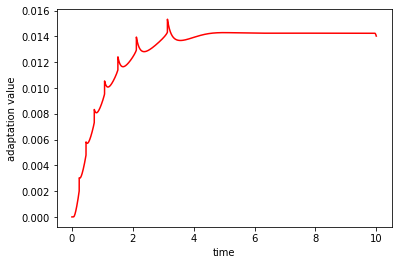

------------------------------



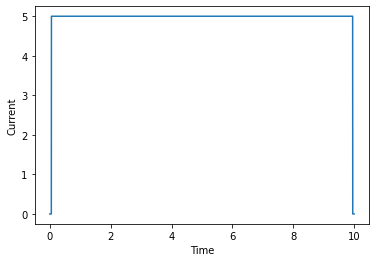

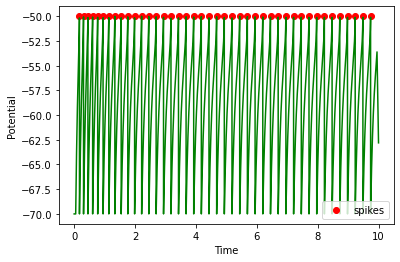

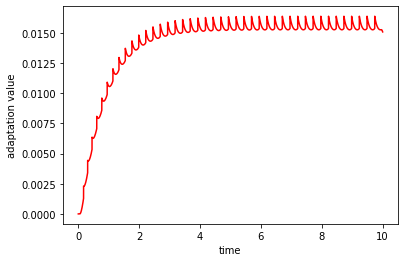

------------------------------



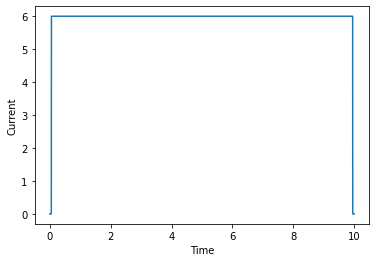

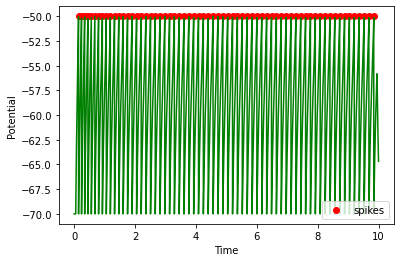

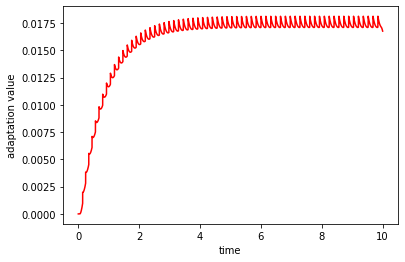

------------------------------



In [46]:
print(param)
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, currents, steps)

#### F-I curve

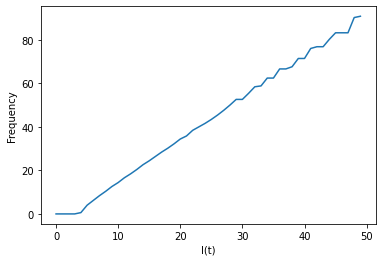

In [47]:
aelif_neuron = AELIFPopulation(**param, shape=(1,))
plot_FI_for_neuron(aelif_neuron)

#### Potential Changes with noisy currents

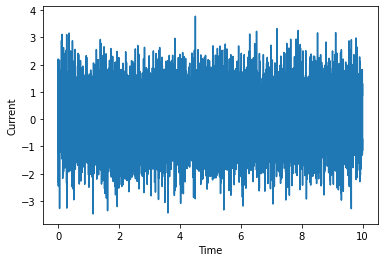

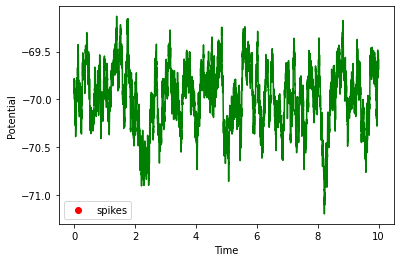

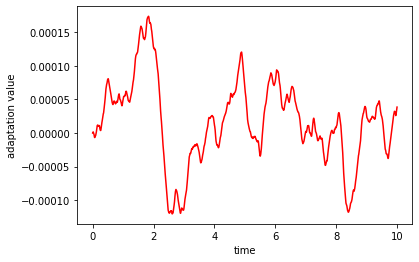

------------------------------



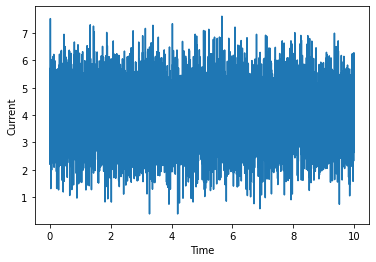

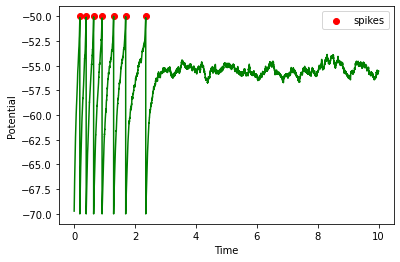

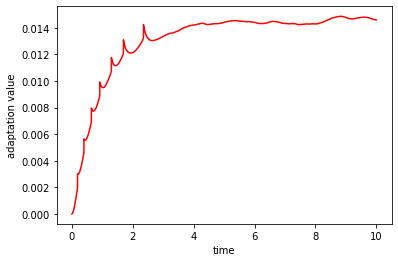

------------------------------



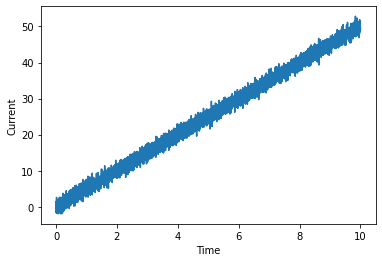

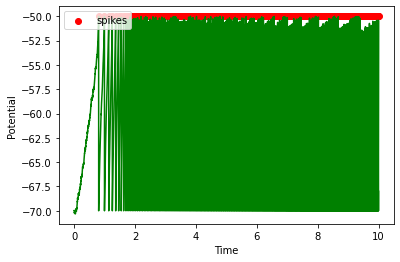

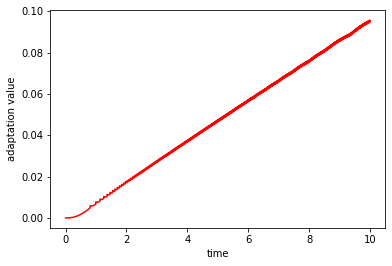

------------------------------



In [48]:
plot_neuron_and_adaptation_and_current(AELIFPopulation, param, noisy_currents, steps)

## Analysis of adaptiva LIF neuron behavior
As we can see in below equations the adaptive LIF model has an adaption function **w** and this adaptation term adds three more parameters to AELIF neuron compared to ELIF neuron:  

$\tau_m . \frac{du}{dt} = -(u - u_{rest}) + \Delta_t \exp(\frac {u - \theta_{rh}} {\Delta_t}) -Rw + R.I(t)$  
$\tau_{w} . \frac{dw}{dt} = a(u - u_{rest}) - w + b\tau_w\sum_{f}\delta(t-t^f)$

These three parameters are:
1. $\tau_w$
2. a
3. b

First of all the term $\tau_w$ indicates (with reverse relation) how fast the adaptation effect works on potential changes with respect to time. the effect of this term can be observed by comparing neuron number 1 and neuron number 2.  
As the potential of the neuron increases the term $a(u - u_{rest})$ increases as well and thus the adaptaion value (w) increases, so the $a$ parameter indicates how much the w function increases apart from spikes, we can see the effect of this parameter by comparing neuron number 1 to neuron number 2.  
after each spike we increase the w value by the amount of $b$ so the $b$ parameter indicates how much each spike effects on the adaptation value (w), we can see the effect of this parameter in the adapatation value plot of all neurons, specially the neuron number 4 which has a high value of $b$ compared to other neurons.